# SQL 4 Data Science: Predict Project
## Bhejane Online Trading Store

### Student Starter Notebook

© Explore Data Science Academy

### Honour Code

I {**YOUR NAME**, **YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

<a id='Context'></a>
### 1. Context

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Bhejane_large.jpg"
     alt="The Black Rhino"
     style="float: center; padding-bottom=0.5em"
     width=600px/>
     Bhejane, or the Black Rhino. Image by <a href="https://commons.wikimedia.org/wiki/File:Black_Rhino_(Diceros_bicornis)_browsing_..._(46584052962).jpg">Wikimedia Commons</a>
</div>


The Bhejane trading store is an online retailer specialising in Covid essesstial items. The store has recently be struggling with the management of its database-related inventory system. Luckily for them, you've been hired as a consultant to fix the problem. 

Its time to flex your Ninja SQL skills! 
 
**Your mission, should you choose to accept it:**

You will receive a denormalised database consisting of two tables. Your task is to transform the database such that is in third normal form (3NF). To ensure that a consistent normalisation process is followed by each student, we have attached an Entity Relationship Diagram (ERD) which is a guideline on what tables need to be produced. Once you have normalised the databasse, you will be required to complete an MCQ test found under the 'Predict' tab of Athena.  

<a id='Imports'></a>
### 2. Imports
Please use the below command to install sql_magic, this is the package that will assist you with SQL syntax hightlighting.
* pip install sql_magic

Remember to start each new cell with " %%read_sql "

In [1]:
# DO NOT EDIT THIS CELL
import sqlite3
import csv
from sqlalchemy import create_engine
%load_ext sql_magic

# Load SQLite database
engine  = create_engine("sqlite:///bhejane.db")
%config SQL.conn_name ='engine'

<a id='Data_description'></a>
### 3. Data description

The original database consist of 2 tables. 
* Product Table
* Transaction Table

In [2]:
# DO NOT EDIT THIS CELL
import pandas as pd
data_description = pd.read_excel('Data Description.xlsx')
data_description

,Table Name,Column Name,Desciption
0,Products,Width,Width of the product once assembled
1,Products,Length,Length of the product once assembled
2,Products,Height,Height of the product once assembled
3,Products,Barcode,The unique product identifier
4,Products,Quantity,Number of goods in stock
5,Products,Brand,Product brand name relating to product company
6,Products,NavigationPath,Navigation path to specific product
7,Products,Colour,Name default colour for the product
8,Products,StockCountry,Country where the stock was bought from
9,Products,ProductDescription,Descriptive product name


<a id='Setting_up'></a>
### 4. Setting up the database

In [3]:
#DO NOT EDIT THIS CELL
conn = sqlite3.connect('bhejane.db')
cursor = conn.cursor()

#### Creating both Products and Transaction Tables

In [4]:
%%read_sql
--DO NOT EDIT THIS CELL
DROP TABLE IF EXISTS "Products";
DROP TABLE IF EXISTS "Transactions";

CREATE TABLE "Products" (
    "Width"   REAL,
    "Length"  REAL,
    "Height"  REAL,
    "Barcode" VARCHAR(150) NOT NULL,
    "Quantity" INTEGER NOT NULL,
    "Brand" VARCHAR(150), 
    "NavigationPath" VARCHAR(150),
    "Colour" VARCHAR(150),
    "StockCountry" VARCHAR(150),
    "ProductDescription" VARCHAR(150) NOT NULL,
    "PackType" VARCHAR(150), 
    "Volume_litre" REAL, 
    "Warranty" VARCHAR(150), 
    "Weight_kg" REAL,
    "ItemDescription" VARCHAR(150), 
    "Price" REAL
);


CREATE TABLE "Transactions" (
    "CartID" INTEGER,
    "Barcode" VARCHAR(150), 
    "Total" REAL,
    "UserName" VARCHAR(150), 
    "InvoiceDate" DATETIME
);

Query started at 02:48:32 PM South Africa Standard Time; Query executed in 0.00 m

#### Load Data into Product and Transaction tables

In [5]:
# DO NOT EDIT CELL
# Load data into Product table
with open('bhejane_covid_essentials_Products.csv','r') as fin: # `with` statement available in 2.5+
    # csv.DictReader uses first line in file for column headings by default
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['Width'],i['Length'],i['Height'], i['Barcode'], i['Quantity'], i['Brand'], i['NavigationPath'], i['Colour'], i['StockCountry'], i['ProductDescription'],i['PackType'],i['Volume_litre'],i['Warranty'],i['Weight_kg'],i["ItemDescription"],i['Price']) for i in dr]

cursor.executemany("INSERT INTO Products VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", to_db)
conn.commit()

with open('bhejane_covid_essentials_Transactions.csv','r') as fin: # `with` statement available in 2.5+
    # csv.DictReader uses first line in file for column headings by default
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['CartID'],i['Barcode'], i['Total'], i['UserName'], i['InvoiceDate']) for i in dr]

cursor.executemany("INSERT INTO Transactions VALUES (?, ?, ?, ?, ?);", to_db)
conn.commit()

<a id='ERD'></a>
### 5. Denormalized Database Tables


<br>

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/SQL4DS/SQL_Predict/Denormalized_Tables.png" alt="Denormalized Tables" border="0">

#### 5.1 Explore the Denormalized Tables
Familiarize yourself with the data given in the two tables by writing your own SQL queries to explore properties of the dataset.i.e Look for data inconsistencies, anormalies, redundancies etc to guide your normalization process. 

This section will not be graded - think of it as your own scratch pad.



In [6]:
%%read_sql

DROP TABLE IF EXISTS "Products_1NF";
DROP TABLE IF EXISTS "Pransactions_1NF";

DROP TABLE IF EXISTS "Products_2NF";
DROP TABLE IF EXISTS "Transactions_2NF";
DROP TABLE IF EXISTS "Navigation_2NF";
DROP TABLE IF EXISTS "PackageContents_2NF";
DROP TABLE IF EXISTS "Colours_2NF";

DROP TABLE IF EXISTS "Colours_3NF";
DROP TABLE IF EXISTS "Products_3NF";
DROP TABLE IF EXISTS "Transactions_3NF";
DROP TABLE IF EXISTS "Navigation_3NF";
DROP TABLE IF EXISTS "PackageContents_3NF";
DROP TABLE IF EXISTS "Users_3NF";
DROP TABLE IF EXISTS "Brands_3NF";
DROP TABLE IF EXISTS "Locations_3NF";

Query started at 02:48:32 PM South Africa Standard Time; Query executed in 0.00 m

In [7]:
%%read_sql
-- #Use this section to explore the database by writing your own queries
SELECT * FROM sqlite_master

Query started at 02:48:32 PM South Africa Standard Time; Query executed in 0.00 m

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,5,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Products,Products,7,"CREATE TABLE ""Products"" (\n ""Width"" REAL,..."
2,table,Transactions,Transactions,8,"CREATE TABLE ""Transactions"" (\n ""CartID"" IN..."


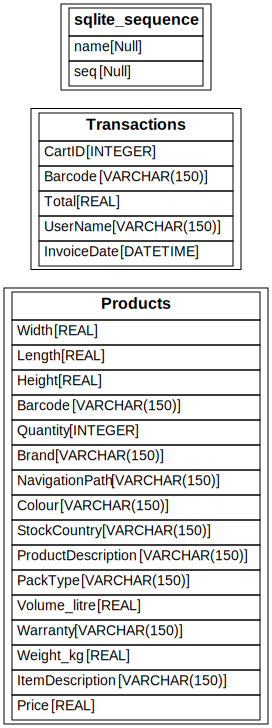

In [8]:
from eralchemy import render_er

render_er("sqlite:///bhejane.db", 'erd.png')

### 6. Normalize the given Database tables to the 1st Normal Form (1NF)

Given the below below target ERD create new tables such the the database conforms to the 1st Normal Form

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/SQL4DS/SQL_Predict/1NF.png" alt="1st Normal Form ERD" border="0">

It is suggested that you create all your tables before attempting to populate them with data, this will help reduce errors that might creep up due to logical dependencies.

#### 6.1 Create the tables required for the 1st Normal Form
Use the above ERD sketch to create the required tables. Please label your tables as they appear in the ERD sketch

In [9]:
%%read_sql
--#Create tables required for 1NF
DROP TABLE IF EXISTS "Transactions_1NF";

CREATE TABLE Transactions_1NF(
    CartID INTEGER NOT NULL,
    Barcode VARCHAR(150) NOT NULL,
    UserName VARCHAR(150) NOT NULL,
    InvoiceDate DATETIME NOT NULL,
    Total REAL NOT NULL,
    PRIMARY KEY (CartID, Barcode)
);

DROP TABLE IF EXISTS "Products_1NF";

CREATE TABLE Products_1NF(
    Barcode VARCHAR(150) NOT NULL,
    NavigationPath VARCHAR NOT NULL,
    ItemDescription VARCHAR(150) NOT NULL,
    ProductDescription VARCHAR(150) NOT NULL,
    Brand VARCHAR(150),
    Price REAL NOT NULL,
    Quantity INTEGER NOT NULL,
    PackType VARCHAR(150),
    Warranty VARCHAR(150),
    StockCountry VARCHAR(150),
    Colour VARCHAR(150),
    Weight_kg REAL,
    Volume_litre REAL,
    Length REAL,
    Width REAL,
    Height REAL,
    PRIMARY KEY (Barcode,NavigationPath,ItemDescription)
);

Query started at 02:48:33 PM South Africa Standard Time; Query executed in 0.00 m

#### 6.2 Populate the tables you have create in the above section.

Populate the tables such that the database conforms to the 1st Normal Form

In [10]:
%%read_sql
--#Populate the 1NF tables

--Transactions_1NF
DELETE FROM Transactions_1NF;
INSERT INTO Transactions_1NF(CartID,Barcode,UserName,InvoiceDate,Total)
SELECT
    CartID,
    Barcode,
    UserName,
    InvoiceDate,
    Total
FROM
    Transactions
ORDER BY CartID;

--Products_1NF
DELETE FROM Products_1NF;
INSERT INTO Products_1NF(Barcode,
                         NavigationPath,
                         ItemDescription,
                         ProductDescription,
                         Brand,
                         Price,
                         Quantity,
                         PackType,
                         Warranty,
                         StockCountry,
                         Colour,
                         Weight_kg,
                         Volume_litre,
                         Length,
                         Width,
                         Height)
SELECT
    Barcode,
    NavigationPath,
    ItemDescription,
    ProductDescription,
    Brand,
    Price,
    Quantity,
    PackType,
    Warranty,
    StockCountry,
    Colour,
    Weight_kg,
    Volume_litre,
    Length,
    Width,
    Height
FROM
    Products;

--Drop Old Tables
DROP TABLE IF EXISTS "products";
DROP TABLE IF EXISTS "transactions";

Query started at 02:48:33 PM South Africa Standard Time; Query executed in 0.00 m

###  7. Convert the database into its 2nd Normal Form (2NF).

Please label your tables as they appear in the ERD sketch.

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/SQL4DS/SQL_Predict/2NF.png" alt="2nd Normal Form ERD" border="0">

In [11]:
%%read_sql
--#Create tables required for 2NF
DROP TABLE IF EXISTS "Transactions_2NF";

CREATE TABLE Transactions_2NF AS
    SELECT * FROM Transactions_1NF;

DROP TABLE IF EXISTS "Navigation_2NF";

CREATE TABLE Navigation_2NF(
    PathID INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
    NavigationPath VARCHAR(150)
);

DROP TABLE IF EXISTS "PackageContents_2NF";

CREATE TABLE PackageContents_2NF(
    ItemID INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
    ItemDescription VARCHAR(150),
    PackType VARCHAR(150),
    Warranty VARCHAR(150)
);

DROP TABLE IF EXISTS "Colours_2NF";

CREATE TABLE Colours_2NF(
    ColourID INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
    Colour VARCHAR(150)
);

DROP TABLE IF EXISTS "Products_2NF";

CREATE TABLE Products_2NF(
    RegistryID INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
    Barcode VARCHAR(150) NOT NULL,
    ProductDescription VARCHAR(150) NOT NULL,
    Brand VARCHAR(150),
    Price REAL NOT NULL,
    Quantity INTEGER NOT NULL,
    StockCountry VARCHAR(150),
    Weight_kg REAL,
    Volume_litre REAL,
    Length REAL,
    Width REAL,
    Height REAL,
    PathID INTEGER NOT NULL,
    ItemID INTEGER NOT NULL,
    ColourID INTEGER NOT NULL,
    
    FOREIGN KEY (Barcode) REFERENCES Transactions_2NF(Barcode),
    FOREIGN KEY (PathID) REFERENCES Navigation_2NF(PathID),
    FOREIGN KEY (ItemID) REFERENCES PackageContents_2NF(ItemID),
    FOREIGN KEY (ColourID) REFERENCES Colours_2NF(ColourID)
);

Query started at 02:48:33 PM South Africa Standard Time; Query executed in 0.00 m

In [12]:
%%read_sql
-- #Populate the tables so that they conform to 2NF
-- Colours_2NF Table
DELETE FROM Colours_2NF;
INSERT INTO Colours_2NF(Colour)
SELECT
    DISTINCT Colour
FROM
    Products_1NF;
--WHERE Colour != '';

-- Navigation_2NF Table
DELETE FROM Navigation_2NF;
INSERT INTO Navigation_2NF(NavigationPath)
SELECT
    DISTINCT NavigationPath
FROM
    Products_1NF;
--WHERE NavigationPath != '';

-- PackageContents_2NF Table
DELETE FROM PackageContents_2NF;
INSERT INTO PackageContents_2NF(ItemDescription, PackType, Warranty)
SELECT DISTINCT
    ItemDescription,
    PackType,
    Warranty
FROM
    Products_1NF;
--WHERE ItemDescription != '';

-- Products_2NF Table
DELETE FROM Products_2NF;
INSERT INTO Products_2NF(Barcode,
                        ProductDescription,
                        Brand,
                        Price,
                        Quantity,
                        StockCountry,
                        Weight_kg,
                        Volume_litre,
                        Length,
                        Width,
                        Height,
                        PathID,
                        ItemID,
                        ColourID)
SELECT
    DISTINCT Barcode,
    ProductDescription,
    Brand,
    Price,
    Quantity,
    StockCountry,
    Weight_kg,
    Volume_litre,
    Length,
    Width,
    Height,
    n.PathID,
    pc.ItemID,
    c.ColourID
FROM
    Products_1NF p
JOIN Navigation_2NF n
ON  n.NavigationPath = p.NavigationPath
JOIN PackageContents_2NF pc
ON pc.ItemDescription = p.ItemDescription 
    AND pc.PackType = p.PackType
    AND pc.Warranty = p.Warranty
JOIN Colours_2NF c
ON c.Colour = p.Colour;

--Drop 1NF Tables
DROP TABLE IF EXISTS "products_1NF";
DROP TABLE IF EXISTS "transactions_1NF";

Query started at 02:48:33 PM South Africa Standard Time; Query executed in 0.00 m

<a id='Target_ERD'></a>
### 8. Convert the table into its 3rd Normal Form (3NF)

Please label your tables as they appear in the ERD sketch

<br>

<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/SQL4DS/SQL_Predict/3NF.png" alt="3rd Normal Form ERD" border="0"></a>

In [13]:
%%read_sql
--#Create tables required for 3NF

--Navigation_3NF
DROP TABLE IF EXISTS "Navigation_3NF";

CREATE TABLE Navigation_3NF AS
    SELECT * FROM Navigation_2NF;

--PackageContents_3NF
DROP TABLE IF EXISTS "PackageContents_3NF";

CREATE TABLE PackageContents_3NF AS
    SELECT * FROM PackageContents_2NF; 

--Colour_3NF
DROP TABLE IF EXISTS "Colour_3NF";

CREATE TABLE Colours_3NF AS
    SELECT * FROM Colours_2NF;

--Brands_3NF
DROP TABLE IF EXISTS "Brands_3NF";

CREATE TABLE Brands_3NF(
    BrandID INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
    Brand VARCHAR(150)
);

--Locations_3NF
DROP TABLE IF EXISTS "Locations_3NF";

CREATE TABLE Locations_3NF(
    LocationID INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
    StockCountry VARCHAR(150)
);

--Users_3NF
DROP TABLE IF EXISTS "Users_3NF";

CREATE TABLE Users_3NF(
    UserID INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
    UserName VARCHAR(150) NOT NULL
);

--Transactions_3NF
DROP TABLE IF EXISTS "Transactions_3NF";

CREATE TABLE Transactions_3NF(
    CartID INTEGER NOT NULL,
    Barcode VARCHAR(150) NOT NULL,
    UserID INTEGER NOT NULL,
    InvoiceDate DATETIME NOT NULL,
    Total REAL NOT NULL,
    
    PRIMARY KEY (CartID, Barcode),
    FOREIGN KEY (UserID) REFERENCES Users_3NF(UserName)
    
);

--Products_3NF
DROP TABLE IF EXISTS "Products_3NF";

CREATE TABLE Products_3NF(
    RegistryID INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
    Barcode VARCHAR(150) NOT NULL,
    ProductDescription VARCHAR(150) NOT NULL,   
    Price REAL NOT NULL,
    Quantity INTEGER NOT NULL,
    Weight_kg REAL,
    Volume_litre REAL,
    Length REAL,
    Width REAL,
    Height REAL,
    
    PathID INTEGER,
    ItemID INTEGER,
    ColourID INTEGER,
    BrandID INTEGER,
    LocationID INTEGER,
    
    FOREIGN KEY (Barcode) REFERENCES Transactions_3NF(Barcode), 
    FOREIGN KEY (PathID) REFERENCES Navigation_3NF(PathID),
    FOREIGN KEY (ItemID) REFERENCES PackageContents_3NF(ItemID),
    FOREIGN KEY (ColourID) REFERENCES Colours_3NF(ColourID),
    FOREIGN KEY (BrandID) REFERENCES Brands_3NF(BrandID),
    FOREIGN KEY (LocationID) REFERENCES Locations_3NF(LocationID)
);

Query started at 02:48:33 PM South Africa Standard Time; Query executed in 0.00 m

In [14]:
%%read_sql

--# Populate the tables to that they conform to the 3rd Normal Form

--Brands_3NF
DELETE FROM Brands_3NF;
INSERT INTO Brands_3NF(Brand)
SELECT
    DISTINCT Brand
FROM
    Products_2NF
ORDER BY Brand;


--Locations_3NF
DELETE FROM Locations_3NF;
INSERT INTO Locations_3NF(StockCountry)
SELECT
    DISTINCT StockCountry
FROM
    Products_2NF;

--Users_3NF
DELETE FROM Users_3NF;
INSERT INTO Users_3NF(UserName)
SELECT
    DISTINCT UserName
FROM
    Transactions_2NF;

--Transactions_3NF
DELETE FROM Transactions_3NF;
INSERT INTO Transactions_3NF(CartID, Barcode, UserID, InvoiceDate, Total)
SELECT
    CartID,
    Barcode,
    u.UserID,
    InvoiceDate,
    Total
FROM
    Transactions_2NF t
JOIN Users_3NF u
ON t.UserName = u.UserName;

--Products_3NF
DELETE FROM Products_3NF;
INSERT INTO Products_3NF(Barcode,
                        ProductDescription,
                        Price,
                        Quantity,
                        Weight_kg,
                        Volume_litre,
                        Length,
                        Width,
                        Height,
                        PathID,
                        ItemID,
                        ColourID,
                        BrandID,
                        LocationID)
SELECT
    DISTINCT Barcode,
    ProductDescription,
    Price,
    Quantity,
    Weight_kg,
    Volume_litre,
    Length,
    Width,
    Height,
    n.PathID,
    pc.ItemID,
    c.ColourID,
    b.BrandID,
    l.LocationID
FROM
    Products_2NF p
JOIN Navigation_3NF n
ON  n.PathID = p.PathID
JOIN PackageContents_3NF pc
ON pc.ItemID = p.ItemID 
--    AND pc.PackType = p.PackType
--    AND pc.Warranty = p.Warranty
JOIN Colours_3NF c
ON c.ColourID = p.ColourID
JOIN Brands_3NF b
ON p.Brand = b.Brand
JOIN Locations_3NF l
ON p.StockCountry = l.StockCountry;

--Drop 2NF Tables
DROP TABLE IF EXISTS "products_2NF";
DROP TABLE IF EXISTS "transactions_2NF";
DROP TABLE IF EXISTS "Navigation_2NF";
DROP TABLE IF EXISTS "PackageContents_2NF";
DROP TABLE IF EXISTS "Colours_2NF";

Query started at 02:48:34 PM South Africa Standard Time; Query executed in 0.00 m

<a id='MCQ_questions'></a>
## 9. MCQ Questions

Having completed the normalisation of the database, you may use the following cells to help you answer the MCQs for the predict. 

Q1) How many unique products does the company have?

In [15]:
%%read_sql
-- Write your query here:

SELECT
    COUNT(DISTINCT barcode) Unique_Produts
FROM
    products_3nf

Query started at 02:48:34 PM South Africa Standard Time; Query executed in 0.00 m

,Unique_Produts
0,608


Q2) How many users bought from Bhejane in April 2020?

In [16]:
%%read_sql
-- Write your query here:

SELECT
    COUNT(DISTINCT username) Customers
FROM
    users_3NF u
JOIN transactions_3nf t
ON u.userid = t.userid
WHERE t.invoicedate BETWEEN '2020-04-01' AND '2020-04-31'

Query started at 02:48:34 PM South Africa Standard Time; Query executed in 0.00 m

,Customers
0,31


Q3) How many users bought three or more items whose combined total was more than R1000 in a single transaction?

In [17]:
%%read_sql
-- Write your query here:

SELECT
    COUNT(DISTINCT username) customers,
    username,
    SUM(t.total),
    count(cartid) num_items
FROM
    users_3nf u
JOIN transactions_3nf t
ON u.userid = t.userid
WHERE t.total > 1000
GROUP BY cartid
HAVING COUNT(cartid) >= 3
ORDER BY num_items DESC

Query started at 02:48:34 PM South Africa Standard Time; Query executed in 0.00 m

,customers,UserName,SUM(t.total),num_items
0,1,DIMPHO,6092.0,4
1,1,Margaret,6864.0,4
2,1,Junaid,13204.0,4
3,1,Daffy,4536.0,4
4,1,Mel,4456.0,4
5,1,Hanno,4002.0,3
6,1,Melandi,7605.0,3
7,1,Karyn,3411.0,3
8,1,Adele,3531.0,3
9,1,Mandla,4053.0,3


Q4) Which user(s) made the largest purchase on a sinlge transaction?

In [18]:
%%read_sql
-- Write your query here

SELECT
    username,
    total
FROM
    users_3nf u
JOIN transactions_3nf t
ON u.userid = t.userid
ORDER BY t.total DESC
LIMIT 5;

Query started at 02:48:34 PM South Africa Standard Time; Query executed in 0.00 m

,UserName,Total
0,Mandla,10999.0
1,Brigette,10999.0
2,Andreas Peter,3765.0
3,Mzoxolo,3765.0
4,Zanele,3464.0


Q5) How many components does the product: "5m Colour Changing RGB LED Strip Light" (MPTAL57588104) come with?

In [19]:
%%read_sql
-- Write your query here

SELECT
    COUNT(DISTINCT itemdescription) Num_of_components
FROM
    packagecontents_3nf pc
JOIN products_3nf p
ON pc.itemid = p.itemid
WHERE p.productdescription = '5m Colour Changing RGB LED Strip Light'

Query started at 02:48:34 PM South Africa Standard Time; Query executed in 0.00 m

,Num_of_components
0,4


Q6) How many brands are available at Bhejane?

In [20]:
%%read_sql
-- Write your query here:

SELECT
    COUNT(brand) Unique_brands
FROM
    Brands_3NF
WHERE brand != ''

Query started at 02:48:34 PM South Africa Standard Time; Query executed in 0.00 m

,Unique_brands
0,232


7) What is the price of the "Verimark - Floorwiz 2in1 Mop"?

In [21]:
%%read_sql
-- Write your query here:

SELECT
    DISTINCT price
FROM
    products_3nf
WHERE productdescription = 'Verimark - Floorwiz 2in1 Mop'

Query started at 02:48:34 PM South Africa Standard Time; Query executed in 0.00 m

,Price
0,179.0


Q8) Calculate the package volume of the "Russell Hobbs - Slow Cooker" using the given dimensions. Round your answer to the nearest integer and ignore units for the calculation.

In [22]:
%%read_sql
-- Write your query here:

SELECT
    DISTINCT(length * width * height) Volume
FROM
    products_3nf
WHERE productdescription = 'Russell Hobbs - Slow Cooker'

Query started at 02:48:34 PM South Africa Standard Time; Query executed in 0.00 m

,Volume
0,26928.0


Q9) Which user made the most transactions in the Year 2020?

In [23]:
%%read_sql
-- Write your query here:

SELECT
    u.username,
    COUNT(t.cartid)
FROM
    users_3nf u
JOIN transactions_3nf t
ON u.userid = t.userid
WHERE t.invoicedate BETWEEN '2020-01-01' AND '2020-12-31'
GROUP BY u.username
ORDER BY COUNT(t.cartid) DESC
LIMIT 5;

Query started at 02:48:34 PM South Africa Standard Time; Query executed in 0.00 m

,UserName,COUNT(t.cartid)
0,Cornelis,9
1,Erlo,8
2,Zanele,6
3,Heather,6
4,Mandla,5


Q10) What is the total number of recorded users that shop at Bhejane?

In [24]:
%%read_sql
-- Write your query here:

SELECT
    COUNT(DISTINCT username)
FROM
    users_3nf u
JOIN transactions_3nf t
ON u.userid = t.userid
WHERE LENGTH(username) > 1
AND username NOT LIKE '%Ã©'

Query started at 02:48:34 PM South Africa Standard Time; Query executed in 0.00 m

,COUNT(DISTINCT username)
0,158


Q11) What is the record count for the Colours_3NF Table?

In [25]:
%%read_sql
-- Write your query here:

SELECT
    COUNT(*)
FROM
    colours_3nf
WHERE colour != ''

Query started at 02:48:34 PM South Africa Standard Time; Query executed in 0.00 m

,COUNT(*)
0,17


Q12) What would the total price be if I had the following items in my cart?
* MPTAL57588104
* 5000394203921
* 6932391917652

In [26]:
%%read_sql
-- Write your query here

SELECT
    SUM(DISTINCT price) Total
FROM
    products_3nf
WHERE barcode IN ('MPTAL57588104', 5000394203921, 6932391917652)

Query started at 02:48:34 PM South Africa Standard Time; Query executed in 0.00 m

,Total
0,734.0


Q13) What is the barcode of the most sold product?

In [27]:
%%read_sql

-- Write your query here

SELECT
    COUNT(barcode),
    barcode
FROM
    transactions_3NF
GROUP BY barcode
ORDER BY COUNT(barcode) DESC
LIMIT 5;

Query started at 02:48:34 PM South Africa Standard Time; Query executed in 0.00 m

,COUNT(barcode),Barcode
0,4,4015400541813
1,3,MPTAL00404857
2,3,HURACANNANOWAVE1
3,3,6009686620537
4,3,6001865825405


Q14) What are the products of Cornelis’ cart on the 2020-06-28 0:00:00?

In [28]:
%%read_sql
-- Write your query here:

SELECT
    DISTINCT productdescription
FROM
    products_3nf p
JOIN transactions_3nf t
ON p.barcode = t.barcode
WHERE t.invoicedate = '2020-06-28 0:00:00'

Query started at 02:48:34 PM South Africa Standard Time; Query executed in 0.00 m

,ProductDescription
0,Dettol Body Wash - Shower Gel - Original - 600ml
1,Vitality Aloe Vera Gel 100ml
2,Sparq Active Resistance Loop Band - Set of 5 w...
3,Protective Face Shield


Q15) Which users bought locally produced, black-coloured products on odd-numbered months of the year, and what was the total cost (rounded to the nearest integer) of these products?

In [39]:
%%read_sql

--Write your query here

SELECT
    u.username,
    p.productdescription,
    CAST(ROUND(total)AS INT),
    invoicedate,
    CAST(SUBSTR(invoicedate,6,2)AS INT) % 2 AS MOD
FROM
    users_3nf u
JOIN transactions_3nf t
ON u.userid = t.userid
JOIN products_3nf p
ON t.barcode = p.barcode
JOIN colours_3nf c
ON p.colourid = c.colourid
JOIN locations_3NF l
ON p.locationid = l.locationid

WHERE c.colour = 'Black'
AND MOD = 1
AND stockcountry = 'South Africa'

GROUP BY username
ORDER BY total DESC;

Query started at 02:56:23 PM South Africa Standard Time; Query executed in 0.00 m

,UserName,ProductDescription,CAST(ROUND(total)AS INT),InvoiceDate,MOD
0,Cindy,RCT 2000VA Line Interactive UPS,1999,2020-03-31 0:00:00,1
1,DIMPHO,Compatible Canon 737 Black Laser Toner Cartridge,1523,2020-07-02 0:00:00,1
2,Carel,JBL T500BT Wireless On-Ear Headphones - Black,799,2020-05-04 0:00:00,1
3,Lacin,Ausdom AW635 1080P Streaming Web Camera - Black,798,2020-05-18 0:00:00,1
4,Hester,Duracell Plus Alkaline AAA Batteries - 20 Pack,189,2020-07-04 0:00:00,1
5,Jeandre,Sodastream - Classic Carbonating Bottle 1 Litr...,179,2020-07-28 0:00:00,1
6,Conrad,Addis - Rough Tote - 30 Litre,93,2020-07-26 0:00:00,1
